In [122]:
import os
from pathlib import Path
import torch
from prepare.text.tokenizer import train_tokenizer

text_batch = [
    "There are some unseen words here banana zen 😁 but also some seen text",
    "Lots of unknowns in this one I expect",
    "text and words and tokens and stuff"
]

test_tokenizer_path = "C:/Users/willf/DataScience/Repos/deep-embedding/de/vae/prepare/text/test_data/test_bpe_tokenizer.json"
base_data_path = Path("C:/Users/willf/DataScience/Repos/deep-embedding/de/vae/prepare/text/test_data")
data_paths = [str(path) for path in base_data_path.glob("**/*.txt")]

tk = train_tokenizer(data_paths=data_paths, save_path=test_tokenizer_path)


encoded_batch = tk.encode_batch(text_batch)
encoded_batch = torch.Tensor([sequence.ids for sequence in encoded_batch])
encoded_batch

tensor([[34., 53., 68., 44., 26.,  1., 15., 19.,  9., 35., 76., 26., 12., 53.,
         26.,  1.,  7., 15.,  7., 15.,  7., 26.,  1., 35., 26.,  1.,  1.,  1.,
          1., 26.,  1.,  1., 20., 40.,  1., 19., 16., 44., 32.,  9., 35., 47.],
        [26.,  1., 16., 20., 19., 64., 26.,  1., 15.,  1., 56., 22., 15., 19.,
         26., 55., 70., 26., 16., 15.,  9., 26.,  1., 26., 36., 17.,  9.,  1.,
         20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [47., 40., 15.,  8., 76., 40., 15.,  8., 30., 16.,  1., 35., 19., 40.,
         15.,  8., 32., 20.,  1., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [2]:
from custom_model import VAE
vae = VAE(input_dim=42, hidden_dims=[16, 4], latent_dim=2)
print(vae)

VAE(
  (encoder_module): StackedEncoder(
    (encoder): Sequential(
      (0): Sequential(
        (0): Linear(in_features=42, out_features=16, bias=True)
        (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): GELU(approximate='none')
      )
      (1): Sequential(
        (0): Linear(in_features=16, out_features=4, bias=True)
        (1): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): GELU(approximate='none')
      )
      (2): Sequential(
        (0): Linear(in_features=4, out_features=2, bias=True)
        (1): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): GELU(approximate='none')
      )
    )
  )
  (decoder_module): StackedEncoder(
    (encoder): Sequential(
      (0): Sequential(
        (0): Linear(in_features=2, out_features=4, bias=True)
        (1): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (

In [121]:
import numpy as np
def print_shape_type(var_name: str, var):
    print(f"Variable Name: {var_name}\nShape{np.shape(var)}\nType: {type(var)}\nVariable: {var}\n")

this_var = [[(np.array([int(0)]))]]
print_shape_type("this_var", this_var)

Variable Name: this_var
Shape(1, 1, 1)
Type: <class 'list'>
Variable: [[array([0])]]



In [132]:
text_batch = [
    "There are some unseen words here banana zen 😁 but also some seen text",
    "text and words and tokens and stuff",
    "Lots of unknowns in this one I expect",
]
print_shape_type("text_batch", text_batch)
sorted_batch = sorted(text_batch, key=len, reverse=True)
print_shape_type("sorted_batch", sorted_batch)
tokenized_batch = tk.encode_batch(sorted_batch)
tokenized_batch = torch.Tensor([sequence.ids for sequence in tokenized_batch]).int()
print_shape_type("tokenized_batch", tokenized_batch)
transposed_batch = tokenized_batch.T
print_shape_type("transposed_batch", transposed_batch)

# print_shape_type("", )
# print_shape_type("", )

Variable Name: text_batch
Shape(3,)
Type: <class 'list'>
Variable: ['There are some unseen words here banana zen 😁 but also some seen text', 'text and words and tokens and stuff', 'Lots of unknowns in this one I expect']

Variable Name: sorted_batch
Shape(3,)
Type: <class 'list'>
Variable: ['There are some unseen words here banana zen 😁 but also some seen text', 'Lots of unknowns in this one I expect', 'text and words and tokens and stuff']

Variable Name: tokenized_batch
Shapetorch.Size([3, 42])
Type: <class 'torch.Tensor'>
Variable: tensor([[34, 53, 68, 44, 26,  1, 15, 19,  9, 35, 76, 26, 12, 53, 26,  1,  7, 15,
          7, 15,  7, 26,  1, 35, 26,  1,  1,  1,  1, 26,  1,  1, 20, 40,  1, 19,
         16, 44, 32,  9, 35, 47],
        [26,  1, 16, 20, 19, 64, 26,  1, 15,  1, 56, 22, 15, 19, 26, 55, 70, 26,
         16, 15,  9, 26,  1, 26, 36, 17,  9,  1, 20,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0],
        [47, 40, 15,  8, 76, 40, 15,  8, 30, 16,  1, 35, 19, 40, 15

In [131]:
import tokenizers
class TextPreprocessor():
    """
    TODO.
    """
    def __init__(
            self,
            tokenizer: tokenizers.Tokenizer,
            ):
        self.tokenizer = tokenizer
    
    def __call__(self, text_batch: list[str]):
        sorted_batch = sorted(text_batch, key=len, reverse=True)
        tokenized_batch = self.tokenizer.encode_batch(sorted_batch)
        tokenized_batch = torch.Tensor([sequence.ids for sequence in tokenized_batch]).int()
        return tokenized_batch.T

text_batch = [
    "There are some unseen words here banana zen 😁 but also some seen text",
    "text and words and tokens and stuff",
    "Lots of unknowns in this one I expect",
]
text_preprocessor = TextPreprocessor(tokenizer=tk)

processed_text_batch = text_preprocessor(text_batch)
processed_text_batch

tensor([[34, 26, 47],
        [53,  1, 40],
        [68, 16, 15],
        [44, 20,  8],
        [26, 19, 76],
        [ 1, 64, 40],
        [15, 26, 15],
        [19,  1,  8],
        [ 9, 15, 30],
        [35,  1, 16],
        [76, 56,  1],
        [26, 22, 35],
        [12, 15, 19],
        [53, 19, 40],
        [26, 26, 15],
        [ 1, 55,  8],
        [ 7, 70, 32],
        [15, 26, 20],
        [ 7, 16,  1],
        [15, 15, 10],
        [ 7,  9, 10],
        [26, 26,  0],
        [ 1,  1,  0],
        [35, 26,  0],
        [26, 36,  0],
        [ 1, 17,  0],
        [ 1,  9,  0],
        [ 1,  1,  0],
        [ 1, 20,  0],
        [26,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [20,  0,  0],
        [40,  0,  0],
        [ 1,  0,  0],
        [19,  0,  0],
        [16,  0,  0],
        [44,  0,  0],
        [32,  0,  0],
        [ 9,  0,  0],
        [35,  0,  0],
        [47,  0,  0]], dtype=torch.int32)

In [129]:
processed_text_batch.T.int().tolist()

[[34,
  53,
  68,
  44,
  26,
  1,
  15,
  19,
  9,
  35,
  76,
  26,
  12,
  53,
  26,
  1,
  7,
  15,
  7,
  15,
  7,
  26,
  1,
  35,
  26,
  1,
  1,
  1,
  1,
  26,
  1,
  1,
  20,
  40,
  1,
  19,
  16,
  44,
  32,
  9,
  35,
  47],
 [26,
  1,
  16,
  20,
  19,
  64,
  26,
  1,
  15,
  1,
  56,
  22,
  15,
  19,
  26,
  55,
  70,
  26,
  16,
  15,
  9,
  26,
  1,
  26,
  36,
  17,
  9,
  1,
  20,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [47,
  40,
  15,
  8,
  76,
  40,
  15,
  8,
  30,
  16,
  1,
  35,
  19,
  40,
  15,
  8,
  32,
  20,
  1,
  10,
  10,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]]

In [130]:
tk.decode_batch(processed_text_batch.T.int().tolist())

[' There are some nseen words here anana en  t aso some seen text',
 ' ots of nnowns in this one  expet',
 ' text and words and toens and stff']

In [ ]:
tk.get_vocab_size()

79

In [25]:
encoded_batch.shape

torch.Size([3, 42])

In [26]:
embedding_dim = round(tk.get_vocab_size() ** 0.25)
test_net = torch.nn.Sequential(torch.nn.Embedding(3, embedding_dim))

3

In [29]:
from pynvml import nvmlInit, nvmlDeviceGetHandleByIndex, nvmlDeviceGetMemoryInfo
def print_gpu_utilization():
    nvmlInit()
    handle = nvmlDeviceGetHandleByIndex(0)
    info = nvmlDeviceGetMemoryInfo(handle)
    print(f"GPU memory occupied: {info.used//1024**2} MB.")

print_gpu_utilization()

NVMLError_LibraryNotFound: NVML Shared Library Not Found

OUTPUT_BATCH shape: torch.Size([15, 5, 6])

LSTM_HIDDEN shape: torch.Size([4, 5, 10])

LSTM_CELL shape: torch.Size([4, 5, 10])

ATTENTION_WEIGHTS shape: torch.Size([5, 15, 20])



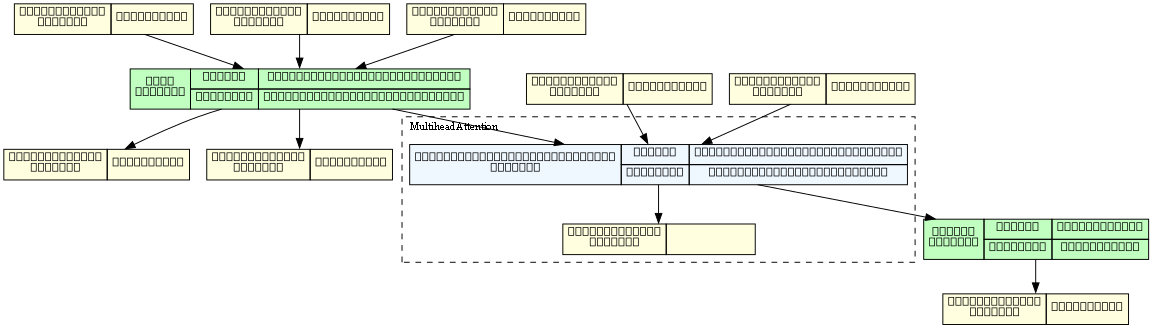

In [4]:
import torch
import graphviz
from torchview import draw_graph
graphviz.set_jupyter_format('png')

from attentive_recurrent_unit import AttentiveRecurrentUnit

# Input Parameters
SOURCE_SEQ_LEN = 20
TARGET_SEQ_LEN = 15
BATCH_SIZE = 5
INPUT_EMBED_DIM = 3

# Model Parameters
LSTM_HIDDEN_DIM = 10
LSTM_NUM_LAYERS = 2
LSTM_BIDIRECTIONAL = True
LSTM_NUM_DIRECTIONS = 2 if LSTM_BIDIRECTIONAL else False
ATTENTION_NUM_HEADS = 2
LINEAR_EMBED_DIM = 6

# Inputs
INPUT_BATCH = torch.randn(SOURCE_SEQ_LEN, BATCH_SIZE, INPUT_EMBED_DIM)
LSTM_HIDDEN = torch.zeros(
    LSTM_NUM_DIRECTIONS * LSTM_NUM_LAYERS,
    BATCH_SIZE,
    LSTM_HIDDEN_DIM,
    )
LSTM_CELL = torch.zeros(
    LSTM_NUM_DIRECTIONS * LSTM_NUM_LAYERS,
    BATCH_SIZE,
    LSTM_HIDDEN_DIM,
    )
ATTENTION_VALUE = torch.zeros(
    SOURCE_SEQ_LEN,
    BATCH_SIZE,
    LSTM_NUM_DIRECTIONS * LSTM_HIDDEN_DIM,
    )
ATTENTION_QUERY = torch.zeros(
    TARGET_SEQ_LEN,
    BATCH_SIZE,
    LSTM_NUM_DIRECTIONS * LSTM_HIDDEN_DIM,
    )

# Construct Model
unit = AttentiveRecurrentUnit(
    input_embed_dim=INPUT_EMBED_DIM,
    lstm_hidden_dim=LSTM_HIDDEN_DIM,
    lstm_num_layers=LSTM_NUM_LAYERS,
    lstm_dropout=0.5,
    lstm_bidirectional=LSTM_BIDIRECTIONAL,
    attention_num_heads=ATTENTION_NUM_HEADS,
    attention_dropout=0.1,
    linear_embed_dim=LINEAR_EMBED_DIM,
    )

# Outputs
OUTPUT_BATCH, (LSTM_HIDDEN, LSTM_CELL), ATTENTION_WEIGHTS = unit(
    input_batch=INPUT_BATCH,
    lstm_hidden=LSTM_HIDDEN,
    lstm_cell=LSTM_CELL,
    attention_value=ATTENTION_VALUE,
    attention_query=ATTENTION_QUERY,
    )

print(f"OUTPUT_BATCH shape: {OUTPUT_BATCH.shape}\n")
print(f"LSTM_HIDDEN shape: {LSTM_HIDDEN.shape}\n")
print(f"LSTM_CELL shape: {LSTM_CELL.shape}\n")
print(f"ATTENTION_WEIGHTS shape: {ATTENTION_WEIGHTS.shape}\n")

# from torchviz import make_dot
# g = make_dot(OUTPUT_BATCH.mean(), params=dict(unit.named_parameters()))
# g.view(
#     directory="C:/Users/willf/DataScience/Repos/deep-embedding/vae/graphs",
#     )

# device='meta' -> no memory is consumed for visualization
model_graph = draw_graph(
    model=unit,
    input_data=dict(
        input_batch=INPUT_BATCH,
        lstm_hidden=LSTM_HIDDEN,
        lstm_cell=LSTM_CELL,
        attention_value=ATTENTION_VALUE,
        attention_query=ATTENTION_QUERY,
    ),
    device='meta', 
    expand_nested=True, 
    roll=True, 
    )
# model_graph.visual_graph.view(
#     # filename="ARUGraph",
#     directory="C:/Users/willf/DataScience/Repos/deep-embedding/vae/graphs",
#     )
model_graph.visual_graph
